In [16]:
import utils
import matplotlib.pyplot as plt
import warnings
import matplotlib.cbook
import numpy as np
import pandas as pd

warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [2]:
trainFrame = utils.readData("resources/quora/data/train.csv")
jacFrame = utils.appendJaccardSimilarity(trainFrame, 1)

dupJac = jacFrame.copy().query("is_duplicate == 1")[["jaccard"]].query("jaccard != 0")
noDupJac = jacFrame.copy().query("is_duplicate == 0")[["jaccard"]].query("jaccard != 0")

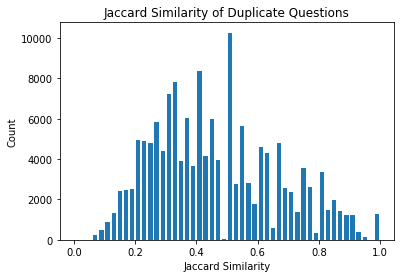

In [3]:
hist, bins = np.histogram(dupJac.values, bins=50, range=(0,1))
center = (bins[:-1] + bins[1:]) / 2
width = 0.7 * (bins[1] - bins[0])
plt.bar(center, hist, align='center', width=width)
plt.xlabel("Jaccard Similarity")
plt.ylabel("Count")
plt.title("Jaccard Similarity of Duplicate Questions")
plt.show()

c:\users\garna\anaconda3\envs\cds\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\garna\anaconda3\envs\cds\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


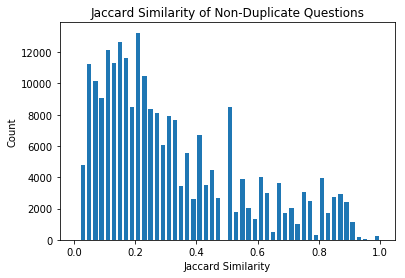

In [4]:
hist, bins = np.histogram(noDupJac.values, bins=50, range=(0,1))
center = (bins[:-1] + bins[1:]) / 2
width = 0.7 * (bins[1] - bins[0])
plt.bar(center, hist, align='center', width=width)
plt.xlabel("Jaccard Similarity")
plt.ylabel("Count")
plt.title("Jaccard Similarity of Non-Duplicate Questions")
plt.show()

In [5]:
newFrame = utils.appendUnsharedWords(trainFrame)

15.967880276465158
32.75213248578878


In [6]:
newFrame

,id,qid1,qid2,question1,question2,is_duplicate,words_not_in_q2,words_not_in_q1
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,india,
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,story,indian happen back would government stole
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,using connection increase vpn,dns increased hacking
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,mentally lonely solve,find [math]23^{24}[/math] 2423 remainder divided
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,sugar one dissolve carbon di oxide quikly methane,would fish survive
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1,risingwhat astrology: sun cap,(sun triple i'm capricorn) ascendant
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0,buy tiago,keeps phone games video far childern active
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1,good,great
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0,シ し,"""and"" ""&"""
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0,motorolla charter (company):,internet free


In [98]:
from importlib import reload
reload(utils)

<module 'utils' from 'C:\\Users\\garna\\Documents\\Cornell_Data_Science\\utils.py'>

In [147]:
augmentedFrame = utils.readData("resources/quora/data/all_augmented_train.csv")

In [148]:
train = augmentedFrame[:320000]
valid = augmentedFrame[320000:360000]
valid.reset_index(level=0, inplace=True)
test = augmentedFrame[360000:]
test.reset_index(level=0, inplace=True)

In [149]:
indices, xTrain = utils.createDataMatrix(train)
validTrainIndices = ~np.isnan(xTrain).any(axis=1)

xTrain = xTrain[validTrainIndices]
testedIndices, xTest = utils.createDataMatrix(valid, False, indices)
validTestIndices = ~np.isnan(xTest).any(axis=1)

xTest = xTest[validTestIndices] 
yTrain = np.array(train["is_duplicate"].tolist())
yTrain = yTrain[validTrainIndices] #change y as well
yTest = np.array(test["is_duplicate"].tolist())
yTest = yTest[validTestIndices] #change y as well

In [150]:
#prior
dupRatio = train["is_duplicate"].sum()/len(train)

In [159]:
#classifier
classifier = utils.createBayesClassifier(xTrain, yTrain, dupRatio)
preds = classifier.predict(xTest)
score = classifier.score(xTest, yTest)
print("Accuracy: " + str(score))

Accuracy: 0.608725


In [164]:
predDup = valid[preds == 1]
predUnDup = valid[preds == 0]

In [183]:
numDups = predDup["is_duplicate"].sum()/len(predDup)
predDup.fillna("")

,index,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate,jaccard,words_not_in_q2,words_not_in_q1,pos_not_in_q1,pos_not_in_q2
5,320005,320005,320005,141925,445503,At what age did you stop believing in Santa?,At what age did your child stop believing in S...,1,0.533333,,happen child,"{'VERB', 'NOUN'}",set()
15,320015,320015,320015,445517,36209,How should I design my database for my app?,How do you design a database?,0,0.272727,app,,set(),{'NOUN'}
21,320021,320021,320021,64794,445524,What is best credit card?,What's the best credit card available right now?,0,0.300000,,right available what's,"{'VERB', 'ADV', 'NOUN', 'ADJ'}",set()
29,320029,320029,320029,445533,196371,What percentage cut does Uber take from the to...,What percentage cut does Uber take from the to...,1,0.875000,chicago,,set(),{'PROPN'}
30,320030,320030,320030,331648,445534,What kind of website would you build?,What kind of website should I build?,0,0.555556,would,,set(),{'VERB'}
39,320039,320039,320039,255821,330856,What is the first programming language you learn?,What was the first programming language?,0,0.555556,learn,,set(),{'VERB'}
55,320055,320055,320055,445556,445557,How do we come to know what our passion is?,How can one come to know their passion?,1,0.384615,,one,{'NUM'},set()
56,320056,320056,320056,391326,69379,How do you compare eukaryotic and prokaryotic ...,How can you compare and contrast eukaryotic an...,1,0.700000,,contrast,{'NOUN'},set()
59,320059,320059,320059,445560,445561,Why do we need to do anything?,Why do we need to?,0,0.833333,anything,,set(),{'NOUN'}
78,320078,320078,320078,260965,445581,How do you tell someone you like them?,Why is it so tough to tell someone you like them?,1,0.384615,,tough,{'ADJ'},set()


In [184]:
numNotDups = predUnDup["is_duplicate"].sum()/len(predUnDup)
predUnDup.fillna("")

,index,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate,jaccard,words_not_in_q2,words_not_in_q1,pos_not_in_q1,pos_not_in_q2
0,320000,320000,320000,445499,445500,"Which credit union, operating in San Francisco...",What is the most technologically advanced cred...,0,0.315789,best interface operating functionality online,technologically advanced,"{'ADV', 'ADJ'}","{'VERB', 'NOUN', 'ADV', 'ADJ'}"
1,320001,320001,320001,445501,445502,How do I read someone?,How do I read someone's blog?,0,0.571429,someone,someone's blog,"{'NOUN', 'PART'}",{'NOUN'}
2,320002,320002,320002,426298,12095,Which is the best site for download tv series ...,Which is the best site to download TV series o...,0,0.692308,,,set(),set()
3,320003,320003,320003,32503,122339,What is a plan for a 2 days/1 night trip to Goa?,Can you suggest how to plan Goa trip for 4 days?,1,0.294118,night 2 days/1,suggest 4 days,"{'VERB', 'NUM', 'NOUN'}","{'NUM', 'NOUN'}"
4,320004,320004,320004,152384,71576,What types of people should you keep away from...,What types of people should I avoid?,1,0.384615,life away keep,avoid,{'VERB'},"{'VERB', 'ADV', 'NOUN'}"
6,320006,320006,320006,105873,445504,Who will win elections of 2017 in Uttar Prades...,How many seats will the BJP be able to win in ...,0,0.300000,2017,seats bjp ongoing able many,"{'VERB', 'NOUN', 'ADJ'}",{'NUM'}
7,320007,320007,320007,445505,445506,Hypothyroidism: I have no symptoms of low thyr...,"Thyroid: If my TSH levels are normal, why is m...",0,0.105263,recently around thryoid thyroid usually elevat...,normal body thyroid: temperature levels,"{'PUNCT', 'NOUN', 'ADJ'}","{'PRON', 'PUNCT', 'VERB', 'NUM', 'NOUN', 'ADV'..."
8,320008,320008,320008,445507,445508,How difficult is it to get into Wharton's busi...,Was it difficult to get into the Wharton Schoo...,1,0.500000,wharton's,wharton,{'NOUN'},"{'NOUN', 'PART'}"
9,320009,320009,320009,445509,238918,What is it like to a parent when their teenage...,What is it like to be a pregnant teenager in I...,0,0.350000,parent tells daughter teenage,teenager india,"{'VERB', 'NOUN'}","{'VERB', 'NOUN'}"
10,320010,320010,320010,445510,445511,Is there fee concession when we get good marks...,In Java what is a more logical way of writing ...,0,0.093750,examination marks concession amritha sastra fe...,way method remove() java list logical iterator...,"{'VERB', 'PUNCT', 'NOUN', 'ADJ'}","{'VERB', 'NOUN', 'ADV', 'ADJ'}"


In [185]:
print("Precision (Duplicates):     " + str(numDups))
print("Precision (Not Duplicates): " + str(1 - numNotDups))

Precision (Duplicates):     0.5576182136602452
Precision (Not Duplicates): 0.6599008457276174
